## Experiment 1 - Linear Polarization and Malus's Law

#### Objective:

* Learn to recognize linearly polarized light from unpolarized light
* Test Malus's Law for linearly polarized light

#### Method:

First objective: 

We used the setups shown in the diagrams of part 1.1 in the lab manual.  To sum up this part of the experiment, we essentially used linear polarizers together with various light sources to determine the polarization of the light coming from different sources.

Second Objective:

Malus's law takes the form, 

$$I = I_o \cos^2(\theta_{rel}) + I_{bg}$$

Therefore to test this law we needed to first determine $I_{bg}$, and then take data for $I$ at a variety of $\theta_{rel}$. 

We first set up materials according to the second diagram in section 1.1 of the lab manual, but we substituted the bench lamp for the laser.  To find $I_{bg}$, we turned off the laser and simply took a reading of the photodetector in the unlit room.

To test Malus's Law, we fixed the first linear polarizer to emit vertically polarized light, and then we used the photodetector to measure the intensity of light coming from the second polarizer at different angles of the second polarizer.  Here the angle of the second polarizer corresponds to $\theta_{rel}$ in Malus's law.  In the data analysis section below, we give our experimentally determined value for $I_o$.


#### Analysis:

I will answer each analysis question in the order they appeared in the lab manual.


Analysis 1: Based on our observations from the first part of the experiment, the laser beam is neither unpolarized nor fully polarized, but it appears to be mostly linearly polarized (The beam never fully vanishes as we rotate the polarizer, but the brightness of the beam varies sinusoidally with $\theta_{rel}$).


Observation/Analysis 2: My laptop screen is emitting linearly polarized light. At a certain $\theta_{rel}$, no light is transmitted through the polarizer, and the brightness of the light varies sinusoidally in a manner expected by Malus's Law.  Together these observations show that the light is linearly polarized.


Analysis 3:  $I_{max}$ was less than $I_{full}$.  This effect occurs because our polarizers are not perfect, and will always filter at least some of the light, even when the transmission axis is parallel to the light's polarization.  To minimize this effect we would simply need to purchase more precise linear polarizers.

<u> Analysis 4: Malus's Law </u>

Our data for this section is shown below.  Here "theta" represents the angle relative angle between the transmission axis of polarizer 1 and polarizer 2, "I" represents the intensity of the light incident on the photodetector, and "delta_theta" and "delta_I" represent the uncertainty in "theta" and "I" respectively.  "theta" has units of degrees and "I" has units of lux.  Also note that "delta_theta" takes into account calibration uncertainties.

In [10]:
data1

,theta,delta_theta,I,delta_I
0,0,2,6842,30
1,10,2,6430,30
2,20,2,6060,30
3,30,2,5130,30
4,40,2,4155,30
5,50,2,3060,20
6,60,2,1868,20
7,70,2,1029,10
8,80,2,350,10
9,90,2,54,5


a) If $x = \cos^2(\theta_{rel})$, then $\delta x = -\sin(2 \theta_{rel}) \cdot \delta\theta_{rel}$  These equations yield the following data table:

In [18]:
datax

,x,delta_x,I,delta_I
0,1.000000e+00,0.139513,6842,30
1,9.698463e-01,0.139513,6430,30
2,8.830222e-01,0.139513,6060,30
3,7.500000e-01,0.139513,5130,30
4,5.868241e-01,0.139513,4155,30
5,4.131759e-01,0.139513,3060,20
6,2.500000e-01,0.139513,1868,20
7,1.169778e-01,0.139513,1029,10
8,3.015369e-02,0.139513,350,10
9,3.749399e-33,0.139513,54,5


b) The following script calculates $\hat{I}_{o, simple}$.

In [57]:
dd = datax
I_o = ((dd.x * dd.I).mean() - (dd.x.mean() * dd.I.mean())) /  ((dd.x **2).mean() - (dd.x.mean() **2))
b = dd.I.mean() - I_o*dd.x.mean()
dy = ((1/8) * ((dd.I - ((I_o * dd.x + b)))**2).sum())**.5
dI = dy / sqrt(10 * ((dd.x **2).mean() - (dd.x.mean() **2)))
db = dI * sqrt((dd.x **2).mean())
print("I: ", I_o)
print("dI: ", dI)
print("b: ", b)
print("db: ", db)

I:  6609.616539001889
dI:  87.3624946103506
b:  192.99173049905585
db:  54.38271432643483


We see that a simple least squares fit yields, 


$$\hat{I}_{o, simple} = 6609 \pm 87\text{ Lux}$$

$$\hat{I}_{bg} = 192 \pm 54\text{ Lux}$$

The following plot shows the residuals of this graph:

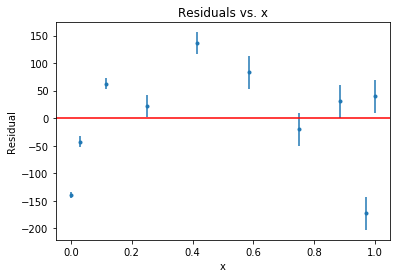

In [59]:
res = dd.I - (dd.x * 6609 + dd.I.mean() - 6609*dd.x.mean())
plt.errorbar(dd.x, res, yerr=dd.delta_I, fmt='.')
plt.axhline(0, 0, 1, color='red')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('Residuals vs. x')
plt.show()

Clearly this simple hypothesis does not do a sufficient job of matching the data.

c) The following script calculates $\hat{I}_o, \hat{I}_{bg}, \delta \hat{I}_o$ and $\delta \hat{I}_{bg}$:

In [67]:
wi = 1 / dd.delta_I ** 2
new_m_t = ((wi.sum() * (wi*dd.x*dd.I).sum()) - ((wi*dd.x).sum()) * (wi*dd.I).sum()) 
new_m_b = wi.sum()*(wi*dd.x*dd.x).sum() - ((wi*dd.x).sum())**2
new_m = new_m_t / new_m_b
b = (((wi*dd.x*dd.x).sum()*(wi*dd.I).sum()) - (wi*dd.x).sum()*(wi*dd.x*dd.I).sum()) / new_m_b
dm = sqrt(wi.sum() / new_m_b)
db = sqrt((wi*dd.x*dd.x).sum() / new_m_b)
print("I: ", new_m, " +- ", dm)
print("b: ", b, " +- ", db)

I:  6786.997519205405  +-  16.01217544550497
b:  102.52202448868258  +-  4.15863507140962


So we see that: 

$$ \hat{I}_o = 6787 \pm 16 \text{ Lux}$$
$$\hat{I}_{bg} = 102 \pm 4\text{ Lux} $$

Plotting the residuals we see:

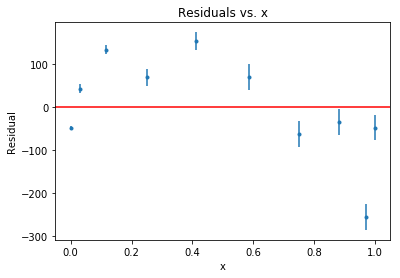

In [69]:
res = dd.I - ((dd.x * new_m) + b)
plt.errorbar(dd.x, res, yerr=dd.delta_I, fmt='.')
plt.axhline(0, 0, 1, color='red')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('Residuals vs. x')
plt.show()

We therefore see that the unweighted least squares approach gives a better fit of the data.  This may be because the different settings of the photodetector had vastly different measurement uncertainties, and this may have affected the weighting.  However, I will continue to use the values of $\hat{I}_o$ and $\hat{I}_{bg}$ from the weighted fit because it agreed more with $I_o$ and $I_{bg}$.

d) We experimentally measured that $\hat{I}_o = 6842 \pm 30$ Lux, and $\hat{I}_{bg} = 48.0 \pm 10$ Lux.  A standard agreement test in $\hat{I}_o$ between our experimentally determined value and calculated value yields 0.8, and therefore our values for $\hat{I}_o$ agree with one another.  An agreement test between our values of $\hat{I}_{bg}$ yields a value of 2.5, which shows these values do not agree.  I would attribute this lack of agreement the fact that the weighted least squares approach yielded a model in which none of the residuals crossed the origin.  This would insinuate that there is perhaps a better method for calculating the various regression coefficients, or that the large differences in uncertainty in the different measurements greatly affected the fitting of the data.

e) The following script calculates the $\tilde{\chi}^2$ value of the data:

In [75]:
rcs = (((dd.I - ((dd.x * new_m) + b)) / dd.delta_I)**2).sum() / 8
print("Reduced Chi Squared: ", rcs)

Reduced Chi Squared:  55.575490602686166


As commented on in the previous section, this value of $\tilde{\chi}^2$ being much greater than 1 indicates that the hypothesis may not be a very good fit of the data.  However, by plotting the data and the fit side by side, we see:

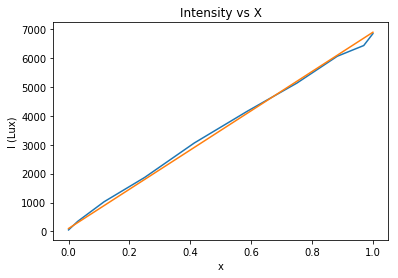

In [77]:
plt.plot(dd.x, dd.I)
plt.plot(dd.x, ((dd.x * new_m) + b))
plt.xlabel('x')
plt.ylabel('I (Lux)')
plt.title("Intensity vs X")
plt.show()

This shows that visually the hypothesis seems to fit the data quite well.  Perhaps the large difference in uncertainty size throughout our data set is leading to our value of $\tilde{\chi}^2$ being larger than 1 even though the hypothesis does appear to be a good fit of the data.

## Experiment 4: Brewster's Angle

#### Objective:

* Find Brewster’s angle for the glass plate and from this determine the index of refraction of the glass.

#### Method and Experimental Procedure:

<u> Theory: </u>

Fresnel's Equations tell us that at some angle, $\theta_{Brewster}$, the reflectance of p-polarized light off a surface goes to zero.  If $n_1$ is the index of refraction of the environment, and $n_2$ is the index of refraction of the material, then Brewster's Angle is given by:

$$ \theta_{Brewster} = \tan ^{-1}\left(\frac{n_2}{n_1}\right)$$

From this equation we see

$$ n_2  = n_1 \cdot \tan(\theta_B),$$

and therefore,

$$\delta n_2 = n_1 \sec^2(\theta_B)  \cdot\delta \theta_B$$


<u> Equipment: </u>

* Optical Bench
* Bench Stands
* Linear Polarizer
* Laser
* Protractor

<u> Procedure: </u>

1. Set up materials as shown below. Be sure that the linear polarizer is polarizing the light horizontally so that the light is p-polarized.

![Experiment 4](exp4.jpg)

2. Use the calibration method from Lab 0 to align the laser pointer directly down the optical bench.
3. Rotate the glass brick until the reflected beam of light disappears.
4. Make sure the glass brick is firmly screwed into its bench stand and then use a protractor to measure the angle between the incident beam and the vector normal to the surface of the glass brick.  This is Brewster's Angle.

<u> Data Analysis: </u>

We measured $$\boxed{\theta_{Brewster} = 0.995 \pm 0.017 \text{ Radians}}$$

Using the equation in the theory section and taking $n_1 = 1$, we calculate that:

$$\boxed{ n_{glass} = 1.54 \pm 0.06 }$$

Clearly this agrees with the accepted value of $1.53$.  There are two possible sources of error in this lab.  The first is the error associated with measuring the angle of incidence with the protractor.  While this error did not greatly affect our results, to minimize this error we could use a more precise protractor.  The second source of error dealt with the fact that near Brewster's Angle, it was very difficult to see when the light actually disappeared, and therefore difficult to find the exact angle.  Again, this did not greatly affect our results, but if we wanted more accurate results, then we could have used a photodetector in a dark room to more precisely determine when the reflected beam of light disappears.  

In [78]:
import pandas as pd
from math import *
import matplotlib.pyplot as plt
from IPython.display import Image
im1 = Image('exp4.jpg')

In [9]:
data1_dict = {'theta': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
              'delta_theta': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
             'I': [6842, 6430, 6060, 5130, 4155, 3060, 1868, 1029, 350, 54],
             'delta_I' : [30, 30, 30, 30, 30, 20, 20, 10, 10, 5]}
data1 = pd.DataFrame(data1_dict)

In [17]:
x = []
dx = []
for index, row in data1.iterrows():
    x.append(cos(row.theta * pi / 180)**2)
    dx.append(sin(row.delta_theta * pi / 90) * row.delta_theta)
datax = pd.DataFrame()
datax['x'] = x
datax['delta_x'] = dx
datax['I'] = data1.I
datax['delta_I'] = data1.delta_I